# Figure Showing Maximum Proton Energy at 300 fs

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sdf_helper as sh

In [2]:
dim = ['1D', '2DP', '2DS', '3D']
intensity = ['1e17','1e17.5', '1e18', '1e18.5', '1e19', '1e19.5', '1e20', '1e20.5', '1e21']

MPE1D = np.zeros(len(intensity))
MPE2DP = np.zeros(len(intensity))
MPE2DS = np.zeros(len(intensity))
MPE3D = np.zeros(len(intensity))

In [3]:
time = 300 
file = time//10
# Loop through maximum proton data files to extract MPE
for d in range(len(dim)):
    for i in range(len(intensity)): 
        dat = np.loadtxt('./'+str(dim[d])+'/2/'+str(intensity[i])+'/ProtonMaxE.dat',delimiter = " ",)
        if d==0:
            MPE1D[i]=dat[file,1]
        elif d==1:
            MPE2DP[i]=dat[file,1]
        elif d==2:
            MPE2DS[i]=dat[file,1]
        else:
            MPE3D[i]=dat[file,1]

In [4]:
# Function to label a0 on Top Axis
def tick_function(I):
    wavelength = 0.8 #um
    V = 0.85493 * (I * wavelength**2/1e18)**0.5
    return ["%.1f" % z for z in V]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

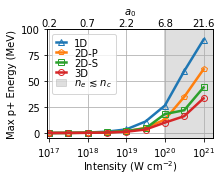

In [5]:
intens = [1e17, 10**17.5, 1e18, 10**18.5, 1e19, 10**19.5, 1e20, 10**20.5, 1e21]
fig=plt.figure()

#plotting settings
al=1
lw = 2.5
###
plt.xlabel('Intensity (W cm$^{-2}$)', labelpad=-1)
plt.ylabel('Max p+ Energy (MeV)')
plt.plot(intens, MPE1D, label='1D',  linewidth=lw,alpha=al,marker='^',fillstyle='none')
plt.plot(intens, MPE2DP, label='2D-P', linewidth=lw,alpha=al,marker='p',fillstyle='none')
plt.plot(intens, MPE2DS, label='2D-S', linewidth=lw,alpha=al,marker='s',fillstyle='none')
plt.plot(intens, MPE3D, label='3D', linewidth=lw,alpha=al,fillstyle='none', marker='o')

plt.xscale('log')
plt.grid()

plt.ylim(-5,100)
plt.xlim(.9e17,1.8e21)

ax = plt.gca()
ax.fill_between((9.75e19,1e22),(120,120),alpha=0.25,color='gray',label = r'$n_e$ %s $n_c$'%'\u2272')
ax.fill_between((9.75e19,1e22),(-10,-10),alpha=0.25,color='gray')

plt.legend(loc='upper left',labelspacing=0, handlelength=1)#, bbox_to_anchor=(0,1.05))

tick_locations = np.array([1e17, 1e18, 1e19,1e20,1e21])
plt.xticks(tick_locations)

######a0 Labels
ax2 = ax.twiny()
ax2.set_xscale('log')

ax2.set_xlim(.9e17,1.8e21)
ax2.set_xticks(tick_locations)
ax2.set_xlabel(r"$a_0$")
ax2.set_xticklabels(tick_function(tick_locations)) #tick_function(new_tick_locations)
ax2.tick_params(which='both',top=False, pad=-3)
######a0 


fig.set_size_inches(3,2.3)
plt.subplots_adjust(bottom=0.19, right=.97, top=.85,left=0.2)

outdir="Figure_Outputs/"
plt.savefig(outdir+'Fig7_ProtonSlice.png', dpi=600)
plt.savefig(outdir+'Fig7_ProtonSlice.pdf', format='pdf', dpi=600)
plt.savefig(outdir+'Fig7_ProtonSlice.eps', format='eps', dpi=600)